In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import joblib

In [2]:
dataset = pd.read_csv('./dataset/Employee-Attrition.csv')
pd.set_option('display.max_columns', None)

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

In [4]:
# Looking for NaN
display(dataset.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
print(dataset['JobRole'].value_counts())
print()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64



### KDEplots

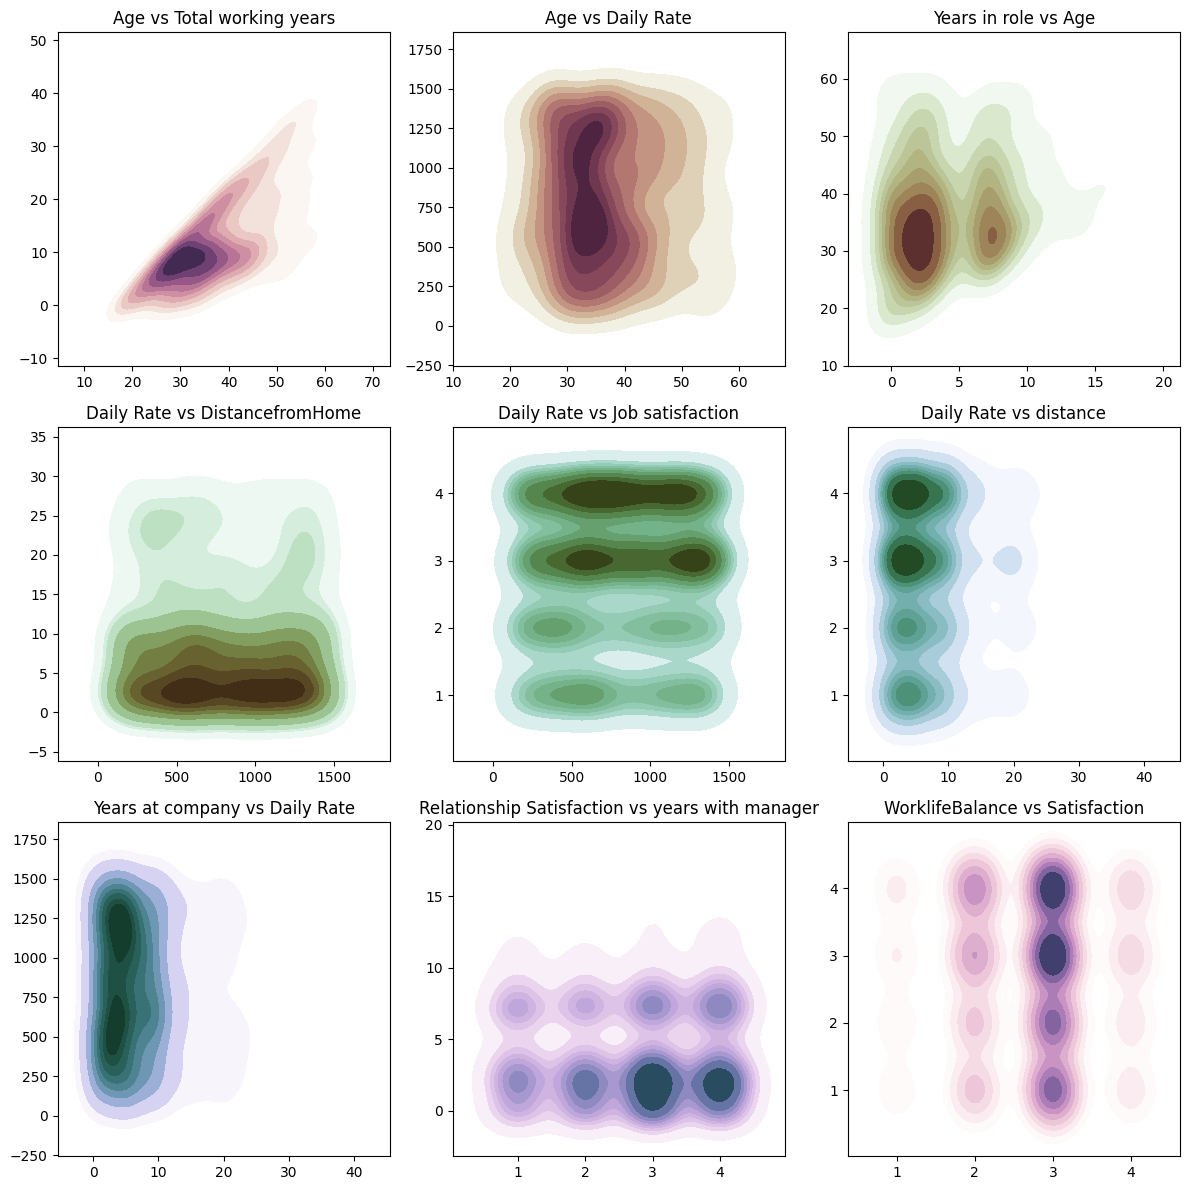

In [7]:
f, axes = plt.subplots(3, 3, figsize=(12, 12), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = dataset['Age'].values
y = dataset['TotalWorkingYears'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age vs Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = dataset['Age'].values
y = dataset['DailyRate'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[0,1])
axes[0,1].set( title = 'Age vs Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = dataset['YearsInCurrentRole'].values
y = dataset['Age'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role vs Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = dataset['DailyRate'].values
y = dataset['DistanceFromHome'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate vs DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = dataset['DailyRate'].values
y = dataset['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate vs Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = dataset['YearsAtCompany'].values
y = dataset['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate vs distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = dataset['YearsAtCompany'].values
y = dataset['DailyRate'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company vs Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = dataset['RelationshipSatisfaction'].values
y = dataset['YearsWithCurrManager'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = dataset['WorkLifeBalance'].values
y = dataset['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance vs Satisfaction')

f.tight_layout()

In [242]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
dataset["Attrition_numerical"] = dataset["Attrition"].apply(lambda x: target_map[x])

### Pearson Correlation

In [243]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome',
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion', u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z=dataset[numerical].astype(float).corr().values,  # Generating the Pearson correlation
        x=dataset[numerical].columns.values,
        y=dataset[numerical].columns.values,
        colorscale='Viridis',
        reversescale=False,
        #         text = True ,
        opacity=1.0

    )
]

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis=dict(ticks='', nticks=36),
    yaxis=dict(ticks=''),
    width=900, height=700,

)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Pairplot Visualisation

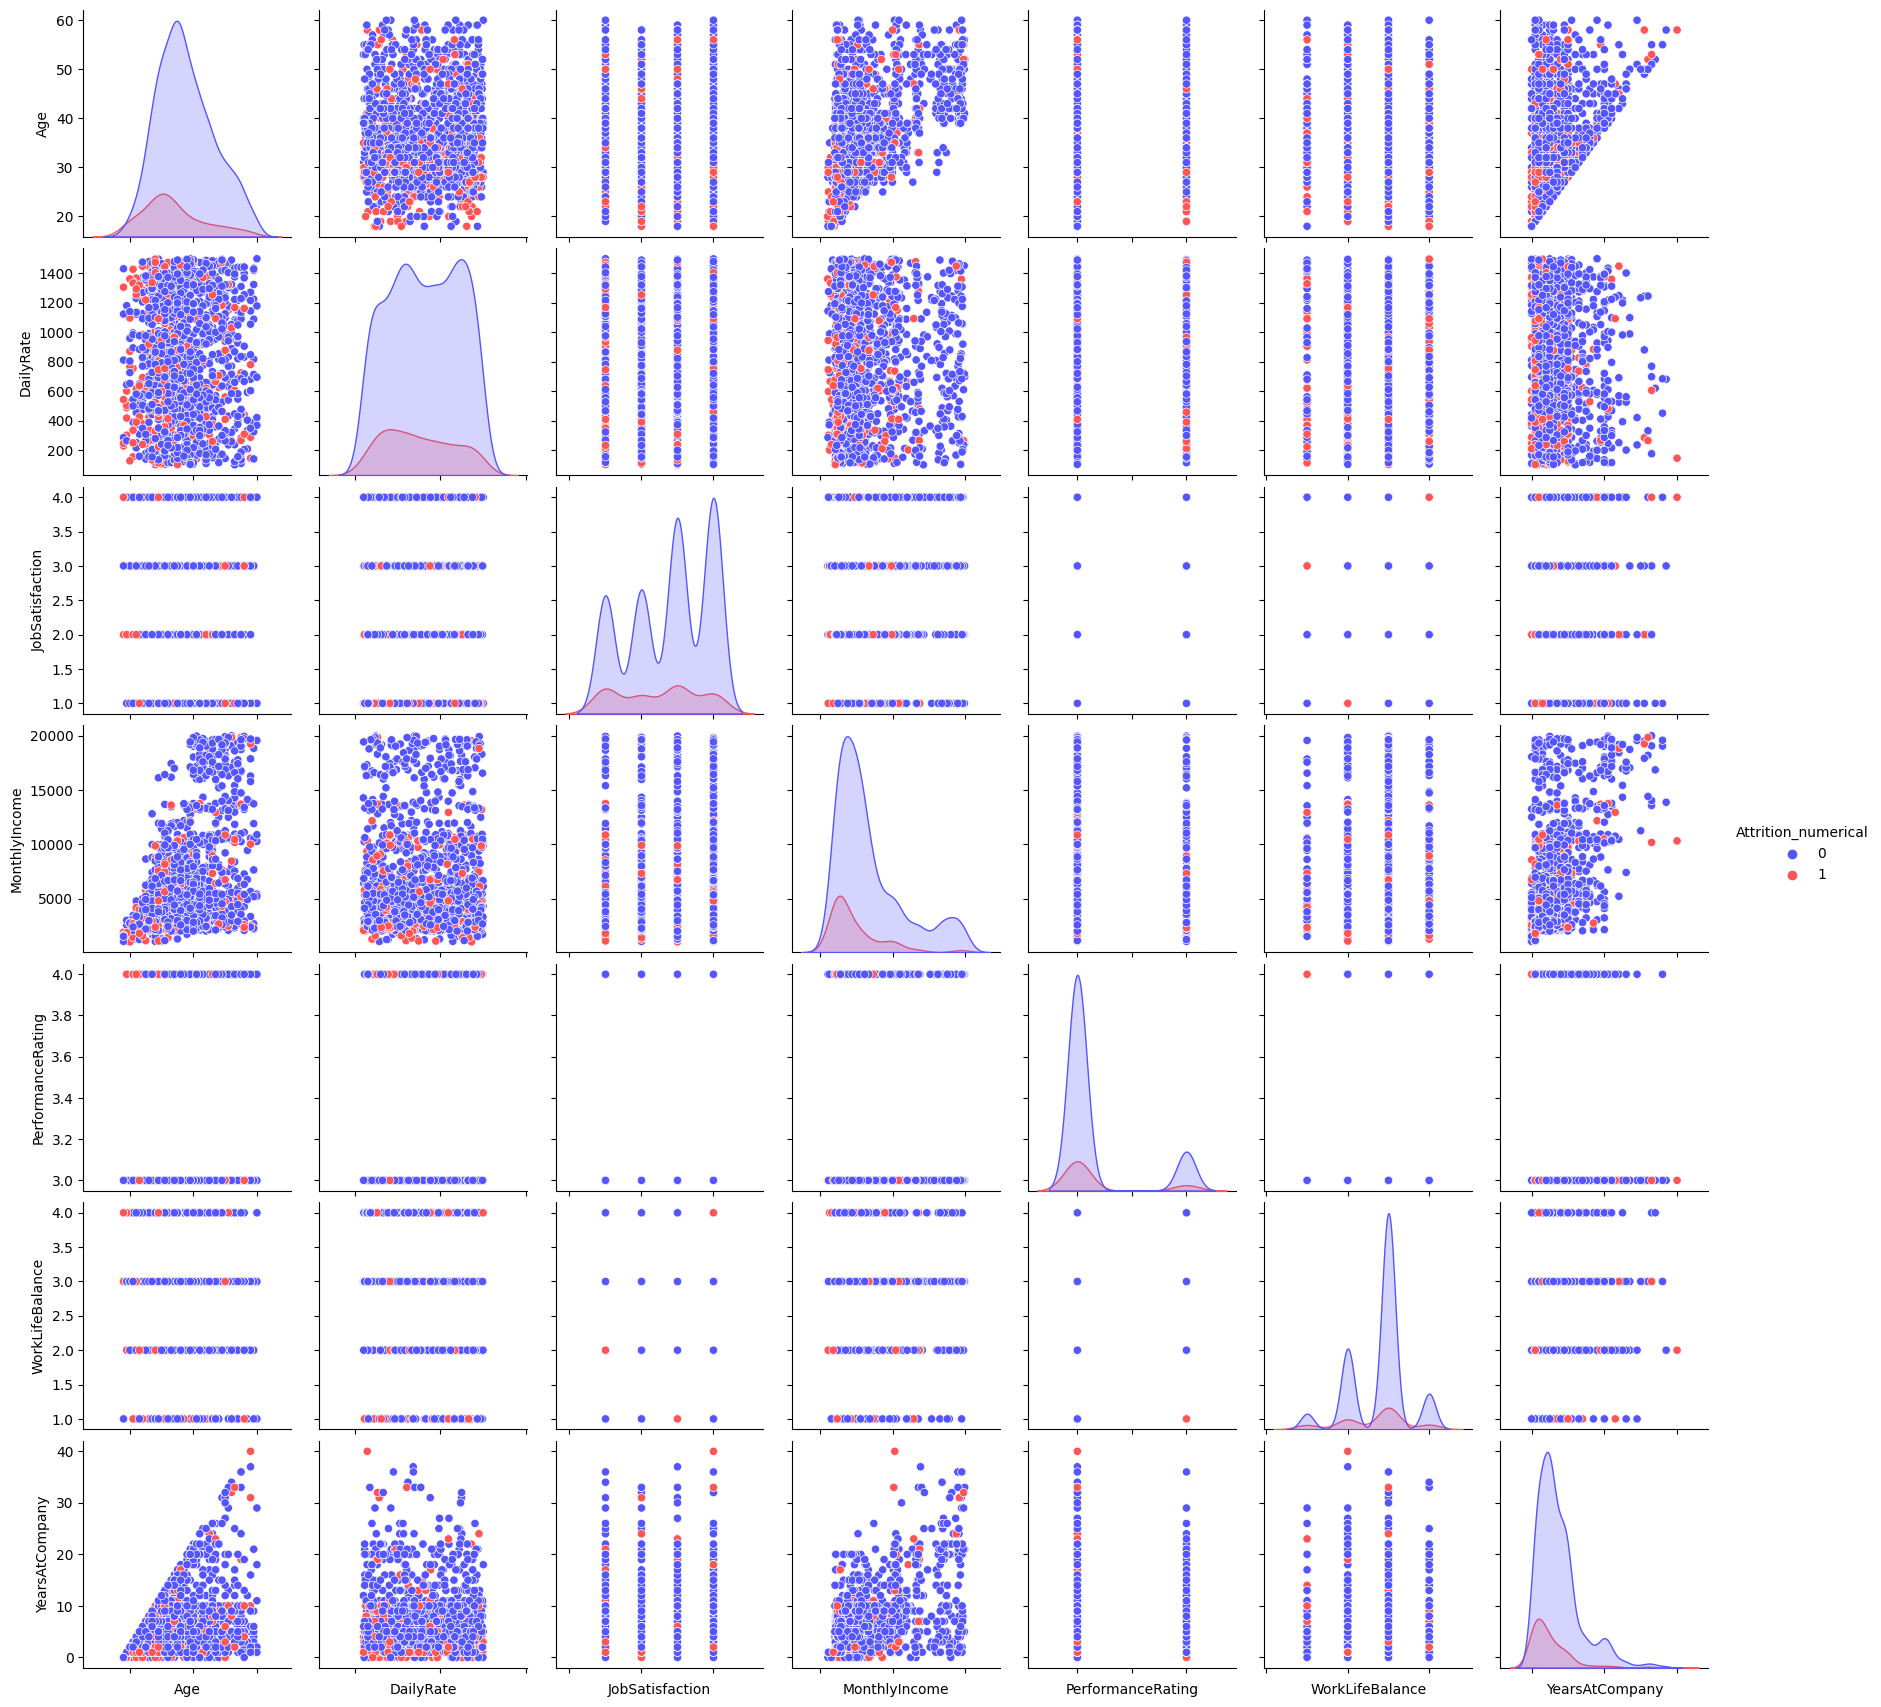

In [18]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(dataset[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(fill=True))
g.set(xticklabels=[])

### Classifying Target Data

In [244]:
Y = dataset['Attrition_numerical']  # Target data
X = dataset.drop(['Attrition', 'Attrition_numerical'], axis=1)

In [245]:
X = pd.get_dummies(X, drop_first=True)

In [246]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


# Feature Selection 

### Using Variance-Threshold

In [247]:
# Removing Columns having 0 Variance

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X)
constant_columns = [column for column in X.columns
                   if column not in X.columns[var_thres.get_support()]]
X = X.drop(constant_columns, axis=1)
print(constant_columns)
X.head()

['EmployeeCount', 'StandardHours']


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


### Using Mutual Information Classification

In [248]:
mutual_info = mutual_info_classif(X, Y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

OverTime_Yes                         0.040297
JobLevel                             0.031140
Age                                  0.025553
StockOptionLevel                     0.023179
MonthlyIncome                        0.022791
YearsAtCompany                       0.016436
JobSatisfaction                      0.015266
JobRole_Sales Representative         0.013179
JobRole_Manufacturing Director       0.012628
TotalWorkingYears                    0.010251
JobRole_Manager                      0.009768
EducationField_Life Sciences         0.008313
TrainingTimesLastYear                0.007829
BusinessTravel_Travel_Frequently     0.005772
Department_Sales                     0.005555
WorkLifeBalance                      0.005302
NumCompaniesWorked                   0.005286
RelationshipSatisfaction             0.004082
Gender_Male                          0.003774
JobRole_Human Resources              0.003772
MonthlyRate                          0.003551
MaritalStatus_Single              

<AxesSubplot: >

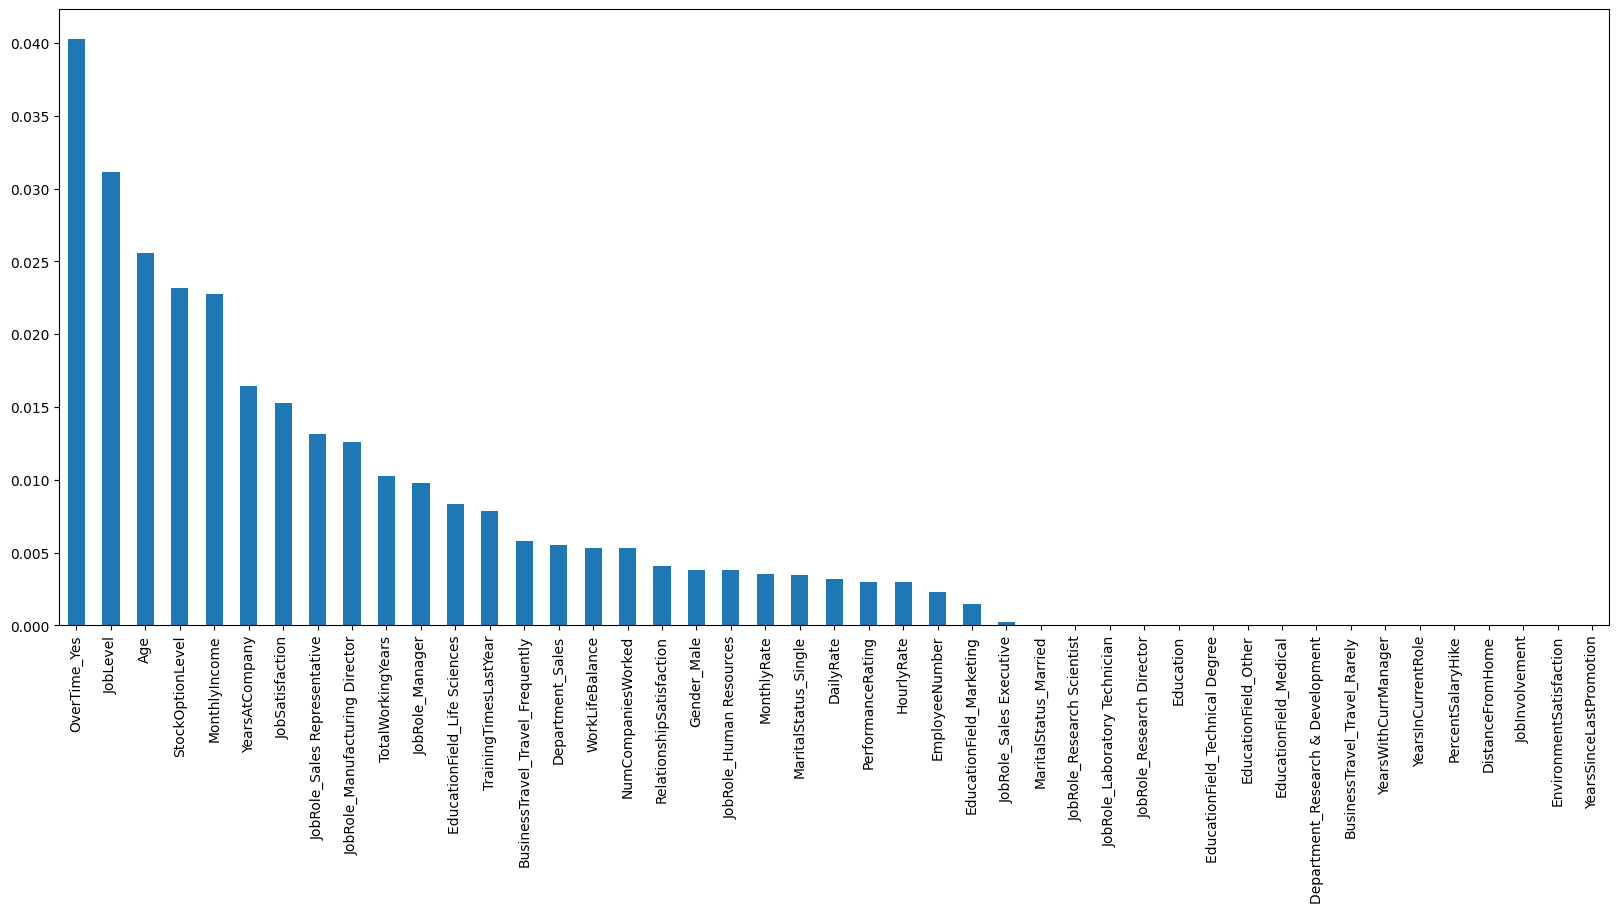

In [249]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [250]:
X = X.drop(['DistanceFromHome', 'Education', 'EmployeeNumber', 'HourlyRate', 'JobInvolvement', 'MonthlyRate',
           'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'YearsInCurrentRole',
           'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
           'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',
           'EducationField_Technical Degree', 'TotalWorkingYears'], axis=1)

In [251]:
X.head()

,Age,DailyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Department_Research & Development,Department_Sales,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,2,2,4,5993,8,11,0,1,6,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,3,2,2,5130,1,23,1,3,10,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,4,1,3,2090,6,15,0,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,4,1,3,2909,1,11,0,3,8,3,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,1,1,2,3468,9,12,1,3,2,2,1,0,1,0,1,0,0,0,0,0,0,1,0,0


In [252]:
X.shape

(1470, 26)

# Implementing ML Model

## Random Forest Classifier

In [253]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=0)
x_train.head()

,Age,DailyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Department_Research & Development,Department_Sales,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
406,52,319,4,3,3,7969,2,14,0,3,5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
418,26,1349,1,1,4,2886,1,22,2,1,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
223,38,119,1,3,3,10609,0,12,2,2,16,5,0,1,1,0,0,0,0,0,0,1,0,0,0,0
510,54,397,3,3,2,10725,2,15,1,4,9,7,0,0,1,1,0,0,0,0,0,0,0,1,0,0
945,50,1322,4,4,1,16880,4,11,0,3,3,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1


In [254]:
y_train.head()

406    0
418    0
223    0
510    0
945    0
Name: Attrition_numerical, dtype: int64

In [255]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [256]:
x_train_std

array([[ 1.61885835, -1.20441928,  1.15142376, ...,  1.08616558,
        -0.68766079,  1.55324445],
       [-1.19708284,  1.34591299, -1.58439414, ..., -0.92066994,
        -0.68766079, -0.64381367],
       [ 0.10258232, -1.69962943, -1.58439414, ..., -0.92066994,
        -0.68766079, -0.64381367],
       ...,
       [ 0.31919319, -0.03572333,  0.23948446, ...,  1.08616558,
        -0.68766079, -0.64381367],
       [-0.00572311, -0.80082301,  0.23948446, ...,  1.08616558,
        -0.68766079, -0.64381367],
       [-0.76386112,  0.34558849, -0.67245484, ..., -0.92066994,
         1.45420536, -0.64381367]])

In [257]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_std, y_train)

RandomForestClassifier()

In [258]:
y_pred = rf.predict(x_test_std)

In [259]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[182   3]
 [ 29   7]]
0.8552036199095022


## Saving Model

In [217]:
joblib.dump(sc, r'.\models\sc_employee.sav')

['.\\models\\sc_employee.sav']

In [218]:
joblib.dump(rf, r'.\models\rf_employee.sav')

['.\\models\\rf_employee.sav']